<a href="https://www.kaggle.com/code/cristianmb/global-commodity-trade-until2016?scriptVersionId=157478937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Context 

The commodities are all raw material and primary agricultural that are traded, constituting the blocks of the Global Economy. Each country trade commodities through Export, sell to foreign  and Import, buy to foreign. In the following analysis, will study Trade Balance (Export less Import),  products most trade and quantity them.

### Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Setup notebook
from pathlib import Path
from IPython.display import display


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv
/kaggle/input/commodity-trade-stastistics/tradeCommodities.csv
/kaggle/input/commodity-trade-stastistics/trade_commodities_UNdata.csv


# Read Dataset

In [2]:
comp_dir = Path('../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv')
#/kaggle/input/global-commodity-trade-statistics
#/kaggle/input/commodity-trade-stastistics/tradeCommodities.csv
#comp_dir = Path('../input//commodity-trade-stastistics/tradeCommodities.csv')

print(comp_dir)
# Get data
trade = pd.read_csv(
    comp_dir,
   # parse_dates=['year'],
   # infer_datetime_format=True,
)


../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225871 entries, 0 to 8225870
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   year             int64  
 2   comm_code        object 
 3   commodity        object 
 4   flow             object 
 5   trade_usd        int64  
 6   weight_kg        float64
 7   quantity_name    object 
 8   quantity         float64
 9   category         object 
dtypes: float64(2), int64(2), object(6)
memory usage: 627.6+ MB


In [4]:
trade.head() 

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


# Exploratory Data Analysis 

Analysis of numerical variables

In [5]:
df = trade.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8225871.0,2.004768e+03,7.037779e+00,1988.0,1999.0,2005.0,2011.00,2.016000e+03
trade_usd,8225871.0,9.505370e+07,7.074154e+09,1.0,11072.0,153416.0,1895476.50,2.443311e+12
weight_kg,8097396.0,3.556503e+07,2.479277e+09,0.0,1089.0,26898.0,447443.25,1.860133e+12
quantity,7921014.0,2.671470e+08,3.739231e+11,0.0,1062.0,27120.0,462362.00,1.026357e+15


## Missing Data

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ( df.isnull().sum()/df.isnull().count() ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
quantity,304857,0.037061
weight_kg,128475,0.015618
country_or_area,0,0.000000
year,0,0.000000
comm_code,0,0.000000
commodity,0,0.000000
flow,0,0.000000
trade_usd,0,0.000000
quantity_name,0,0.000000
category,0,0.000000


# Commodity with most Trade. 

In [7]:
years = pd.unique(df.year)
countries = pd.unique(df.country_or_area)
quantityName = pd.unique(df.quantity_name)
commoditys = pd.unique(df.commodity)



In [8]:
# Function that your outputs are values means of the commodities by year and commodity with trade_usd max 

def commodity_values(df , years = years):
    X = pd.DataFrame(columns = [
    'commodity'  , 'trade_usd', 'weight_kg' , 'quantity'])

    for  y  in years:
        X=pd.concat( [X ,  df.loc[df.year == y, : ].groupby('commodity' , as_index = False).mean()  ]  ,
                  axis =0 ,
                  ignore_index=True,
                 )
        
    X = X.loc[   X["commodity"] != "ALL COMMODITIES" , : ]
    
    Xmax = X.groupby("commodity" )['trade_usd'].max().sort_values(ascending = False)
    
    return X , Xmax

dfcomm , dfcomm_max = commodity_values(df)

In [9]:
dfincre = dfcomm.copy()


In [10]:
dfincre.loc[  dfincre.year == dfincre.year.min() ].groupby( 'commodity' )

### Graphic 1: Commodity with most commercialization.

We noted  greater commodities trade correspond a Nonrenewable Energies followed by Gold.



<AxesSubplot:ylabel='commodity'>

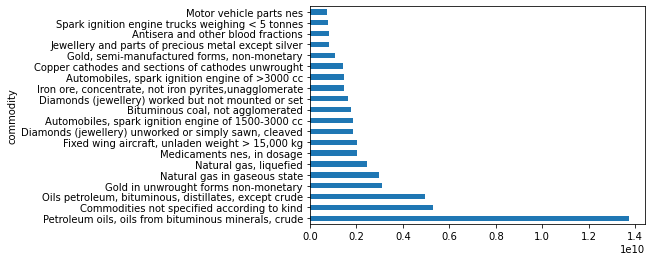

In [11]:
commodities_high =  dfcomm_max[:20]
dfcomm_max[:20].plot( kind = 'barh') 

### Values Average net 

Analysis of average net trade by country.

In [12]:
def values_means(df , years = years):
    X = pd.DataFrame(columns = [
    'country_or_area'  , 'trade_usd', 'weight_kg' , 'quantity'])

    for  y  in years:
        X=pd.concat( [X ,  df.loc[df.year == y, : ].groupby('country_or_area' , as_index = False).mean()  ]  ,
                  axis =0 ,
                  ignore_index=True,
                 )
    return X

In [13]:
    
dfmean = values_means(df) 
dfmean.head()

,country_or_area,trade_usd,weight_kg,quantity,year
0,Afghanistan,1.262052e+08,8.157713e+07,7.808982e+07,2016.0
1,Albania,3.719241e+06,1.665207e+06,1.598488e+06,2016.0
2,Algeria,3.128360e+07,2.497603e+07,2.763032e+07,2016.0
3,Antigua and Barbuda,2.729315e+05,6.816062e+04,6.881024e+04,2016.0
4,Argentina,2.905905e+07,1.835266e+07,1.852955e+07,2016.0


### Graphic 2: Average Trade Net

In the fellowing graphic showing the Average Trade Net (Import plus Export) for Chile, USA, China, Brazil and Germany. Note high trade USA.

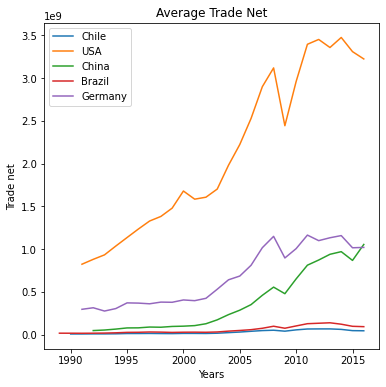

In [14]:
def plot_values_means( dfmean , feature='trade_usd', labels=['Chile', 'USA', 'China', 'Brazil', 'Germany'], cotaUSD = 0 ):
    fig, ax = plt.subplots(figsize=(6, 6))
    for country in labels:
        X= dfmean.loc[ dfmean.country_or_area == country, :]   
        X = X.sort_values('year')
        ax.plot( X.year , 
                 X[feature] , 
                 label=country )
        
    ax.legend()
    ax.set_xlabel('Years')
    ax.set_ylabel( 'Trade net')
    ax.set_title( 'Average Trade Net')
    
    return  plt.show()
    



plot_values_means(dfmean )

### Graphic 2: Average Quantity


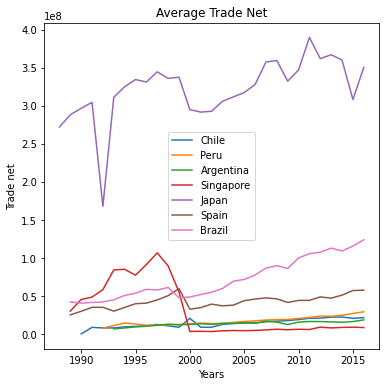

In [15]:
plot_values_means(dfmean, feature='quantity', labels=['Chile', 'Peru', 'Argentina', 'Singapore', 'Japan', 'Spain', 'Brazil'] )

### Graphic 2: Average Weight 


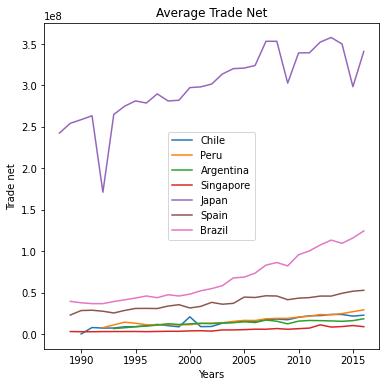

In [16]:
plot_values_means(dfmean, feature='weight_kg', labels=['Chile', 'Peru', 'Argentina', 'Singapore', 'Japan', 'Spain', 'Brazil'] )

### Trade Balance

The Trade Balance correspond to Export less Import.

In [17]:
dfyear  = df.loc[df.year == 2011, : ]
dfyear.groupby('country_or_area' , as_index = False).mean()



,country_or_area,year,trade_usd,weight_kg,quantity
0,Afghanistan,2011.0,1.395085e+08,8.218498e+07,8.016655e+07
1,Albania,2011.0,2.713991e+06,1.454935e+06,1.645541e+06
2,Algeria,2011.0,5.060014e+07,3.103181e+07,3.068062e+07
3,Andorra,2011.0,8.360607e+05,2.372265e+05,2.856384e+05
4,Angola,2011.0,4.181131e+07,2.740738e+07,3.177438e+07
...,...,...,...,...,...
168,Venezuela,2011.0,3.572676e+08,2.698668e+07,2.998687e+07
169,Viet Nam,2011.0,3.588837e+08,4.182631e+07,4.382896e+07
170,Yemen,2011.0,5.449042e+07,1.355119e+07,1.374702e+07
171,Zambia,2011.0,3.666790e+07,2.985139e+06,3.388420e+06


In [18]:
def trade_balance(df, countries= ['Chile','Japan' ], years= years):
    TD = pd.DataFrame(index= years)

    for nation in countries:
        X = df.loc[df.country_or_area == nation , :] 
        B = []
        for  y  in years :
            row = []   
            df_year = X.loc[ X.year == y, : ]
        
            df_export = df_year.loc[df_year.flow == 'Export', :]
            Export = df_export['trade_usd'].sum()
  
            df_import = df_year.loc[df_year.flow == 'Import', :]
            Import = df_import['trade_usd'].sum()
        
            B.append(  Export - Import  ) 
        #TD.assign( nation=B)    
        TD[nation] = B
            
    
    
    # compare trade deficit 
    sns.lineplot(   data=TD  )
    
    return TD

### Graphic 5: Comparative Trade balance Chile-USA.

The folowing figure show that USA has been in **Trade Deficit** a longer several years. While Chile has had a slight rise.

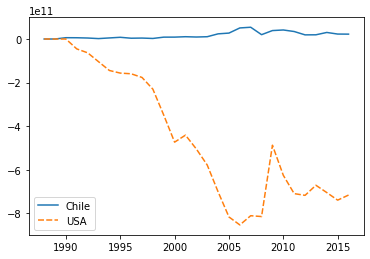

In [19]:
trade_dt = trade_balance(df, countries=['Chile','USA'])


In [20]:
trade_dt.head()

,Chile,USA
2016,22327712045,-715697754732
2008,19932468109,-814210156774
2015,22707553980,-739069816493
2014,30077443373,-704331837689
2013,19326065649,-670812128733


### Graphic 5: Comparative Trade balance Chile-Japon.



In the last decade of the 20th century, Japan had swing Trade Balance, already start the 2000s there was a decline for about of ten years that has been raising last years.

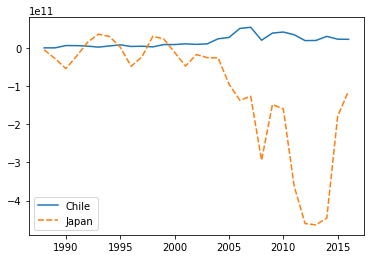

In [21]:
balance1 = trade_balance(df) 

#### Others Questions to resolver

Which is commodity most higher trade per country?

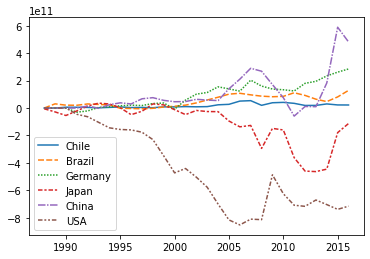

In [22]:
trade_balance_countries = trade_balance(df, [ 'Chile', 'Brazil', 'Germany', 'Japan', 'China', 'USA'])  

In [23]:
balance1.to_csv('balance1', index=False)
trade_dt.to_csv('balance_Chi_US', index=False)
dfmean.to_csv('dfmean_trade_usd.csv', index=False) # net trade
trade_balance_countries.to_csv('trade_balance.csv', index=False) # net trade


In [24]:
trade_balance_countries.head()

,Chile,Brazil,Germany,Japan,China,USA
2016,22327712045,128938164517,285210845669,-112966741977,482447394421,-715697754732
2008,19932468109,86840600158,160343346000,-294231357324,268708708459,-814210156774
2015,22707553980,81281724139,261969454232,-179129376954,589588895339,-739069816493
2014,30077443373,47155903816,234460971601,-445600244762,183131340899,-704331837689
2013,19326065649,64667412623,194950439026,-463599396152,10031714036,-670812128733


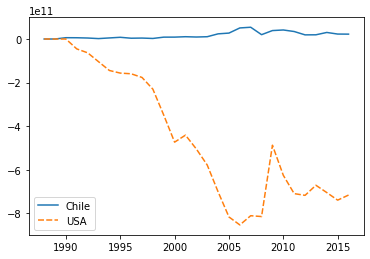

In [25]:
trade_dt = trade_balance(df, countries=['Chile','USA'])

In [26]:
df_max = dfcomm_max.to_frame()
dfcomm_max[:20].to_csv('commdoties_higher_20.csv', index=False)